In [1]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
from matplotlib import cm
import seaborn as sns
%matplotlib inline


In [2]:
data = pd.read_csv("data/train.csv")
data.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [3]:
data.columns


Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [4]:
info = data.antiguedad.value_counts()
info.index.sort_values()

Float64Index([ 0.0,  1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0,
              11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0,
              22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0,
              33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0,
              44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0,
              55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0,
              66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 74.0, 75.0, 76.0, 77.0, 79.0,
              80.0],
             dtype='float64')

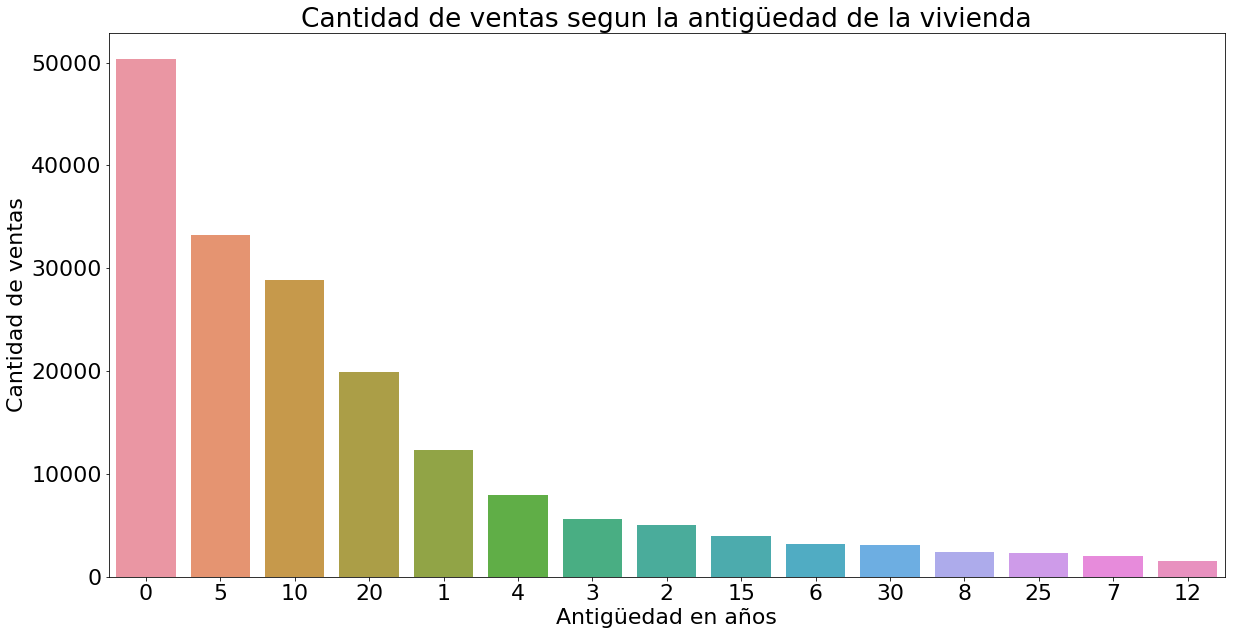

In [5]:
info = data.antiguedad.value_counts().to_frame().head(15).reset_index()
info.columns = ['antiguedad','ventas']
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})

fig = sns.barplot(x=info['antiguedad'], y=info['ventas'], order=info['antiguedad'])

fig.set_title('Cantidad de ventas segun la antigüedad de la vivienda')
fig.set_xlabel("Antigüedad en años")
fig.set_ylabel("Cantidad de ventas")
fig.set_xticklabels(info.antiguedad.astype(int))
# fig.set_yticklabels(info.ventas,fontsize=20)
plt.show(fig)

#Se pued

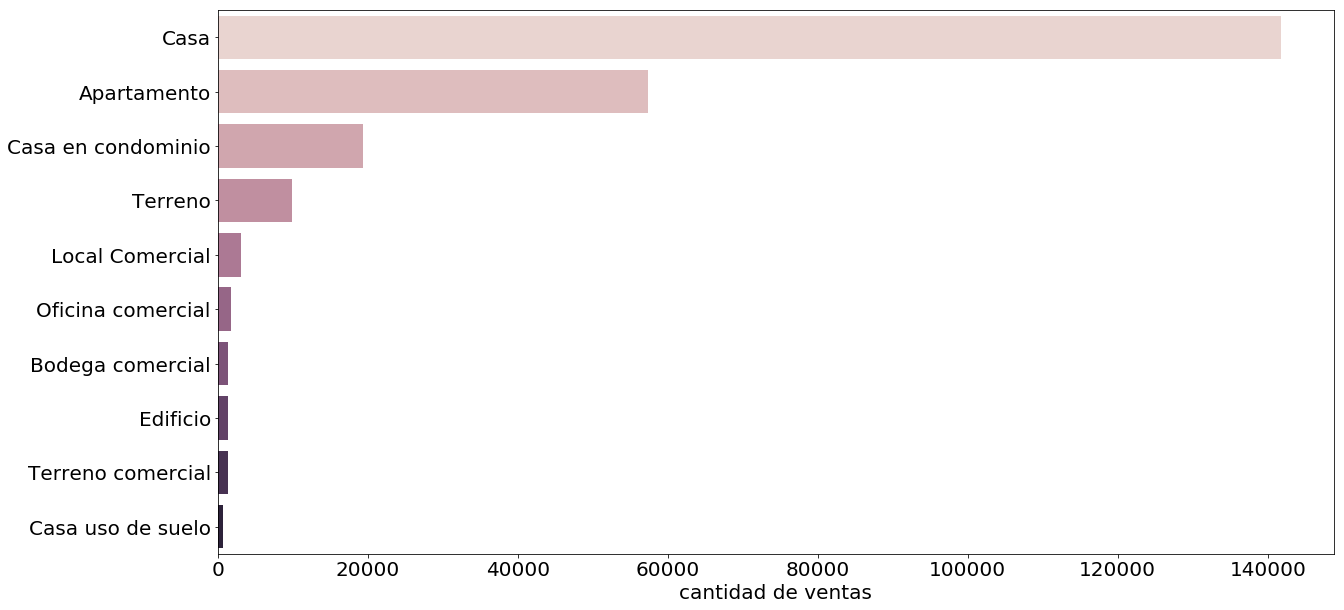

In [23]:
tipos = data.tipodepropiedad.value_counts().head(10)
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
fig = sns.barplot(y=tipos.index, x=tipos, palette= sns.cubehelix_palette(10))
fig.set_xlabel("cantidad de ventas")
plt.show(fig)

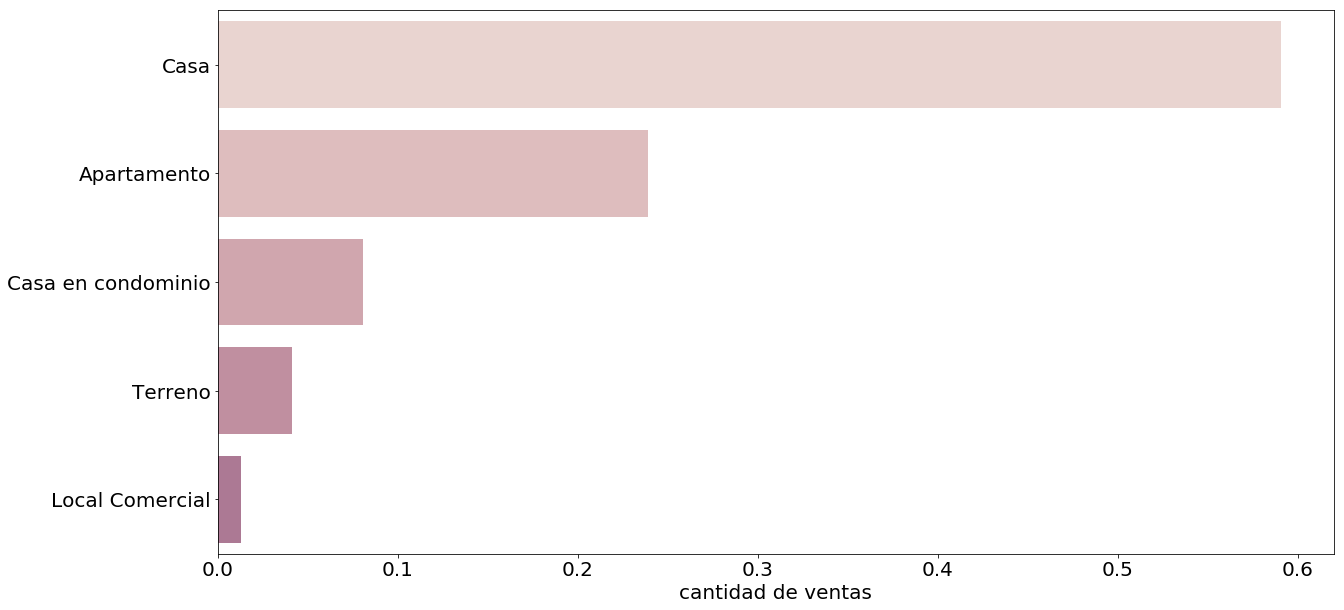

In [24]:
tipos = data.tipodepropiedad.value_counts(normalize=True).head(5)
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
fig = sns.barplot(y=tipos.index, x=tipos, palette= sns.cubehelix_palette(10))
fig.set_xlabel("cantidad de ventas")
plt.show(fig)

In [7]:
#Sankey
tipos = data.tipodepropiedad.value_counts(normalize = True)
total = tipos.sum()
orients = [0, 0,-1,-1,-1, -1, 1, 1, 1, 1, 1, 1 ,1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ,1 , 1]
orients = [0,0,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]

listaCount = (-tipos).tolist()
listaCount.insert(0, total)

listaTipos = tipos.index.tolist()
listaTipos.insert(0, "total")


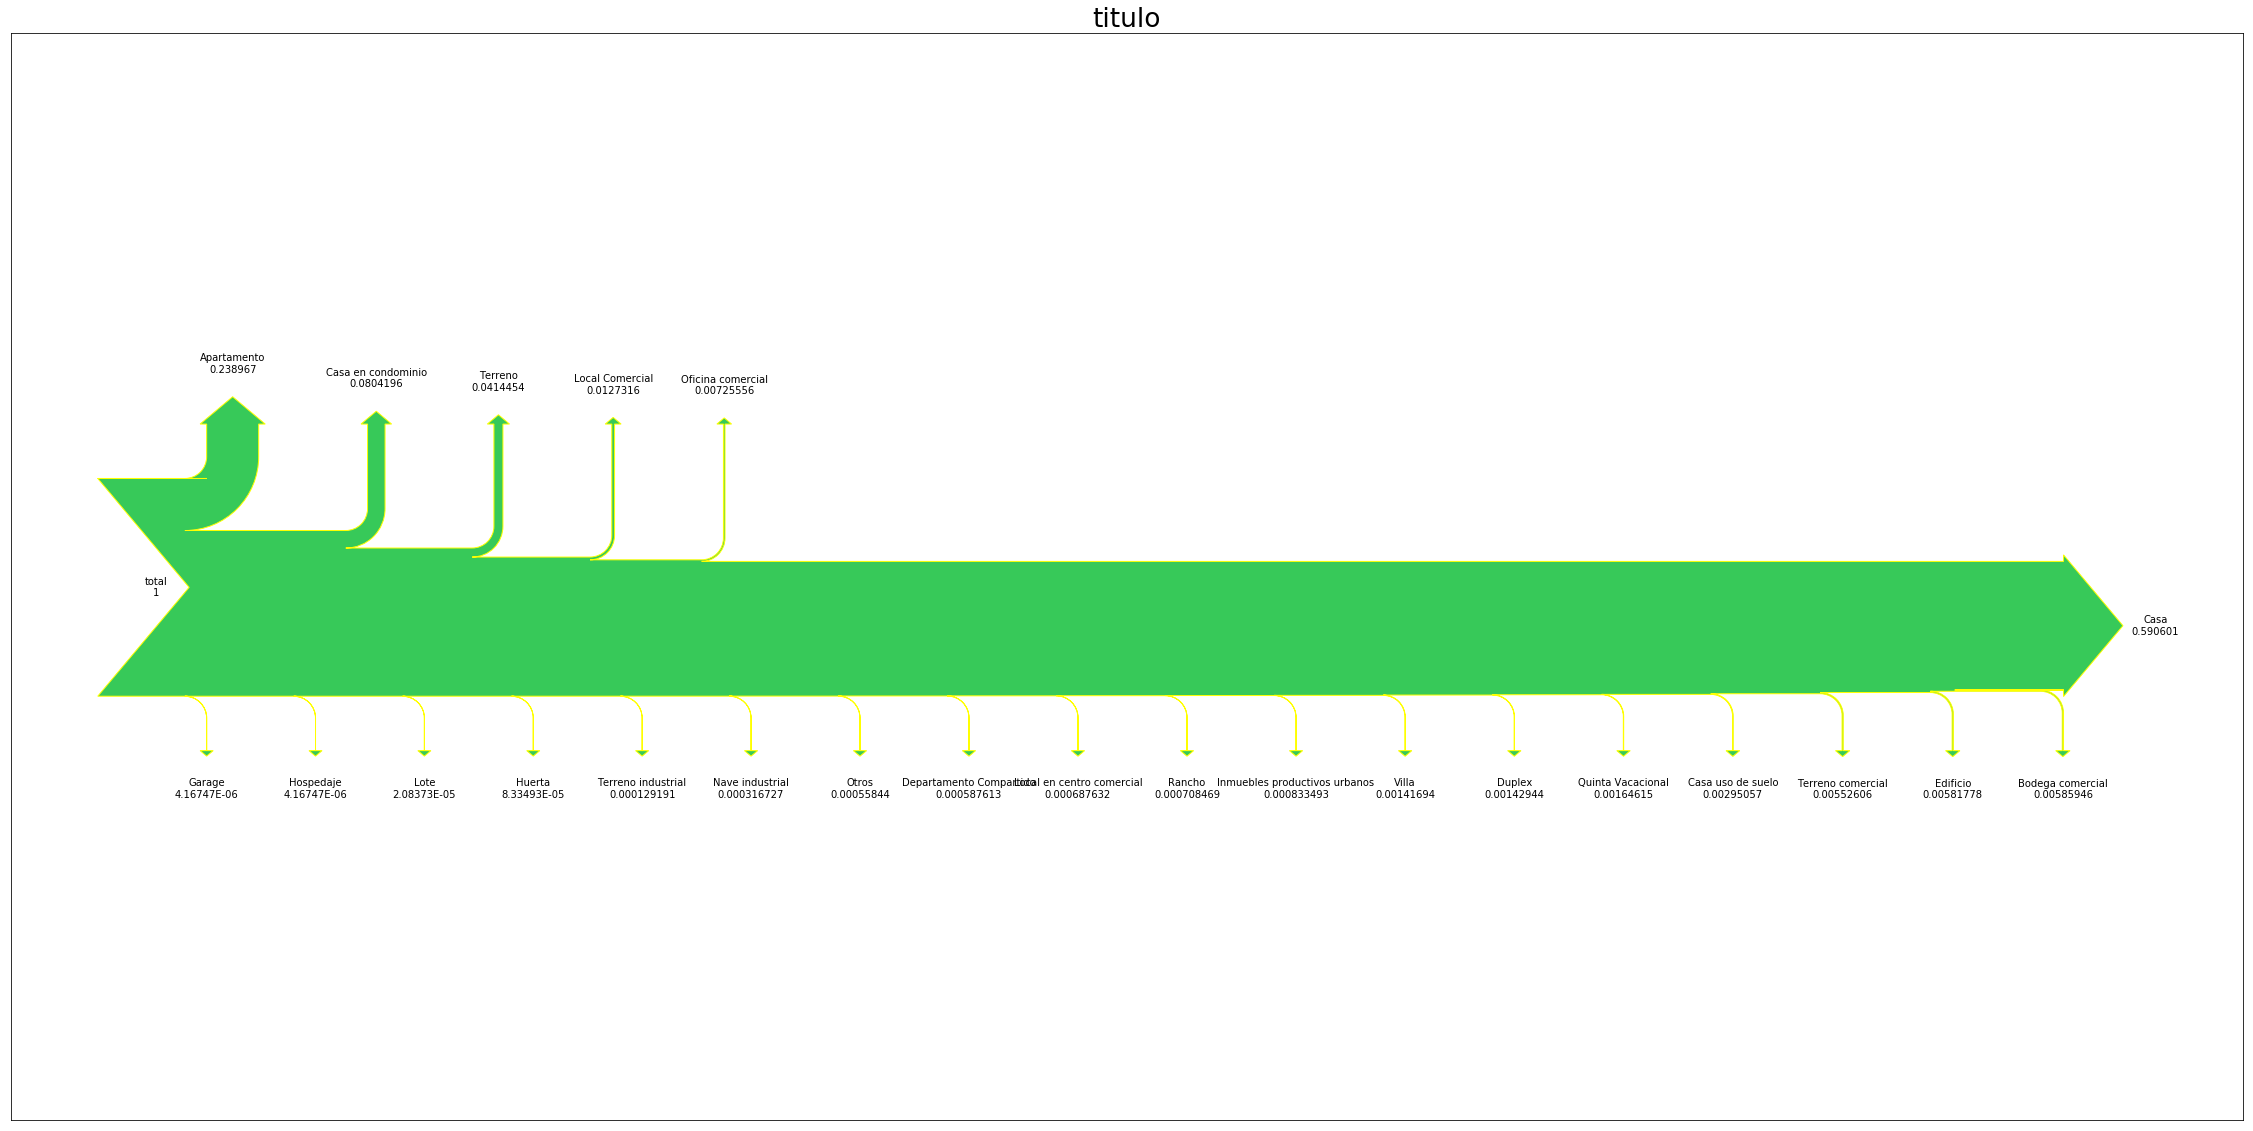

In [8]:
fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="titulo")
diagrams = Sankey(ax=ax,facecolor='#37c959', flows=listaCount,labels=listaTipos, scale = 1.0, color = 'yellow', gap=0.5, orientations=orients).finish()
for diagram in diagrams:
    for text in diagram.texts:
        text.set_fontsize('10')
plt.show()